### 패키지 import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Data파일 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rating_df = pd.read_csv('/content/drive/MyDrive/수업자료/00_dataset/movielens/ml-100k/u.data', sep = '\t')
rating_df.columns = ['user_id', 'item_id', 'rating', 'timestamp']

### 데이터 분석

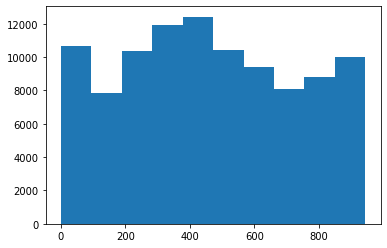

In [ ]:
plt.hist(rating_df.user_id)
plt.show()

In [ ]:
user_num = rating_df.user_id.nunique()
movie_num = rating_df.item_id.nunique()
rating_count = rating_df.rating.value_counts()

print(user_num, movie_num) # 사람 수, 영화 수
rating_count = rating_count.sort_index()
rating_count

943 1682


1     6110
2    11370
3    27144
4    34174
5    21201
Name: rating, dtype: int64

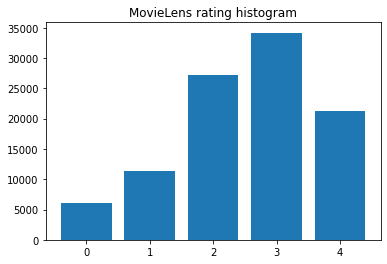

In [ ]:
# 별점 분포 보기
plt.bar(list(range(len(rating_count))), rating_count.to_list())
plt.title('MovieLens rating histogram')
plt.show()

In [ ]:
u_cnt = rating_df.user_id.value_counts()
u_cnt # 가장 평을 많이 한 user는?

405    737
655    685
13     636
450    540
276    518
      ... 
475     20
242     20
866     20
309     20
19      20
Name: user_id, Length: 943, dtype: int64

In [ ]:
i_cnt = rating_df.item_id.value_counts() 
i_cnt #가장 사람들이 평을 많이 한 영화는?

50      583
258     509
100     508
181     507
294     485
       ... 
852       1
1505      1
1653      1
1452      1
1641      1
Name: item_id, Length: 1682, dtype: int64

### item 파일 읽어오기

In [ ]:
movie_info_df = pd.read_csv('/content/drive/MyDrive/수업자료/00_dataset/movielens/ml-100k/u.item', encoding = 'latin-1', sep='|')
movie_info_df.columns = ['movie_id' , 'movie_title' , 'release_date' , 'video_release_date' ,
              'IMDb_URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Children' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']
movie_info_df

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movie_info_df[movie_info_df['movie_id'] == 50]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
48,50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,...,0,0,0,0,0,1,1,0,1,0


In [ ]:
user_info_df = pd.read_csv('/content/drive/MyDrive/수업자료/00_dataset/movielens/ml-100k/u.user', sep='|')
user_info_df.columns = ['user_id' , 'age' , 'gender' , 'occupation' , 'zip_code']
user_info_df

,user_id,age,gender,occupation,zip_code
0,2,53,F,other,94043
1,3,23,M,writer,32067
2,4,24,M,technician,43537
3,5,33,F,other,15213
4,6,42,M,executive,98101
...,...,...,...,...,...
937,939,26,F,student,33319
938,940,32,M,administrator,02215
939,941,20,M,student,97229
940,942,48,F,librarian,78209


In [ ]:
occupation_list = user_info_df.occupation.unique() #직업 종류 보기
print(occupation_list, len(occupation_list))

['other' 'writer' 'technician' 'executive' 'administrator' 'student'
 'lawyer' 'educator' 'scientist' 'entertainment' 'programmer' 'librarian'
 'homemaker' 'artist' 'engineer' 'marketing' 'none' 'healthcare' 'retired'
 'salesman' 'doctor'] 21


## 통계적 추천 시스템

#### 영화 평균 평점 계산

In [ ]:
average_rating_df = rating_df.groupby('item_id').mean()  #영화 기준으로 평균 점수 내기
average_rating_df

,user_id,rating,timestamp
item_id,,,
1,477.011062,3.878319,8.828054e+08
2,492.007634,3.206107,8.834174e+08
3,459.133333,3.033333,8.822269e+08
4,469.497608,3.550239,8.827175e+08
5,439.372093,3.302326,8.825882e+08
...,...,...,...
1678,863.000000,1.000000,8.892896e+08
1679,863.000000,3.000000,8.892895e+08
1680,863.000000,2.000000,8.892896e+08


#### 최고 평점 영화 id 추출하기

In [ ]:
average_rating_df.sort_values('rating', ascending = False)
top_score_df = average_rating_df[average_rating_df['rating'] == 5]
top_score_df

,user_id,rating,timestamp
item_id,,,
814,13.000000,5.0,8.863023e+08
1122,60.000000,5.0,8.833265e+08
1189,345.000000,5.0,8.885378e+08
1201,90.000000,5.0,8.913837e+08
1293,384.666667,5.0,8.887183e+08
1467,565.000000,5.0,8.783198e+08
1500,530.000000,5.0,8.774704e+08
1536,385.000000,5.0,8.794413e+08
1599,437.000000,5.0,8.801426e+08


#### movie_info dataframe에서 최고 평점 영화 정보 가져오기

In [ ]:
movie_info_df.loc[814] # 하나만 할 때
movie_info_df.loc[[814, 1122]]
top_ranking_movie_df = movie_info_df.loc[top_score_df.index] # 평점이 5점인 모든 인덱스를 출력 할 때
top_ranking_movie_df

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
item_id,,,,,,,,,,,,,,,,,,,,,
814,816,Candyman: Farewell to the Flesh (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Candyman:%20F...,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1122,1124,"Farewell to Arms, A (1932)",01-Jan-1932,NaN,http://us.imdb.com/M/title-exact?Farewell%20to...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1189,1191,"Letter From Death Row, A (1998)",01-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Letter+From+D...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1201,1203,Top Hat (1935),01-Jan-1935,NaN,http://us.imdb.com/M/title-exact?Top%20Hat%20(...,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1293,1295,Kicked in the Head (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kicked+in+the...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1467,1469,Tom and Huck (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Tom%20and%20H...,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1500,1502,Naked in New York (1994),01-Jan-1994,NaN,http://us.imdb.com/Title?Naked+in+New+York+(1994),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1536,1538,All Over Me (1997),25-Apr-1997,NaN,http://us.imdb.com/M/title-exact?All%20Over%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1599,1601,Office Killer (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### 영화에 년도 칼럼 추가

In [ ]:
top_ranking_movie_df['year'] = top_ranking_movie_df['release_date'].str.split('-').str[-1]
top_ranking_movie_df

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
item_id,,,,,,,,,,,,,,,,,,,,,
814,816,Candyman: Farewell to the Flesh (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Candyman:%20F...,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1995
1122,1124,"Farewell to Arms, A (1932)",01-Jan-1932,NaN,http://us.imdb.com/M/title-exact?Farewell%20to...,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1932
1189,1191,"Letter From Death Row, A (1998)",01-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Letter+From+D...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1201,1203,Top Hat (1935),01-Jan-1935,NaN,http://us.imdb.com/M/title-exact?Top%20Hat%20(...,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1935
1293,1295,Kicked in the Head (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kicked+in+the...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
1467,1469,Tom and Huck (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Tom%20and%20H...,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1995
1500,1502,Naked in New York (1994),01-Jan-1994,NaN,http://us.imdb.com/Title?Naked+in+New+York+(1994),0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1994
1536,1538,All Over Me (1997),25-Apr-1997,NaN,http://us.imdb.com/M/title-exact?All%20Over%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
1599,1601,Office Killer (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1997


In [ ]:
pd.DatetimeIndex(top_ranking_movie_df['release_date']).year # datetime 형식에서 연도를 뽑는 방법

Int64Index([1995, 1932, 1998, 1935, 1997, 1995, 1994, 1997, 1997, 1994], dtype='int64', name='release_date')

#### 가장 최신 영화 추천

In [ ]:
top_ranking_movie_df['year'] = pd.DatetimeIndex(movie_info_df.loc[top_score_df.index]['release_date']).year

top_ranking_movie_df.sort_values('year', ascending=False)
top_ranking_movie_df[top_ranking_movie_df.year > 1996]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
item_id,,,,,,,,,,,,,,,,,,,,,
1189,1191,"Letter From Death Row, A (1998)",01-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Letter+From+D...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1293,1295,Kicked in the Head (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kicked+in+the...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
1536,1538,All Over Me (1997),25-Apr-1997,NaN,http://us.imdb.com/M/title-exact?All%20Over%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
1599,1601,Office Killer (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1997


아이들의 정보 가져오기

In [ ]:
young_user_index = user_info_df[user_info_df['age'] < 20]['user_id']
young_rating_df = rating_df[rating_df['user_id'].isin(young_user_index)]
young_rating_df

,user_id,item_id,rating,timestamp
15,303,785,3,879485318
18,291,1042,4,874834944
23,291,118,2,874833878
45,246,201,5,884921594
64,246,919,4,884920949
...,...,...,...,...
99956,851,979,3,875730244
99960,621,809,4,880740136
99976,618,628,2,891308019
99983,646,750,3,888528902


In [ ]:
young_rating_df['item_id'].nunique()

1177

ID 별 평점 정보 추출하기

In [ ]:
average_young_rating_df = young_rating_df.groupby('item_id').mean()
average_young_rating_df

average_young_rating_df.sort_values('rating', ascending = False)
top_score_df = average_young_rating_df[average_rating_df['rating'] == 5]['rating']
top_score_df

,user_id,rating,timestamp
item_id,,,
1,510.729730,3.621622,8.831738e+08
2,457.916667,3.166667,8.830081e+08
3,514.133333,3.400000,8.820102e+08
4,513.600000,3.733333,8.814178e+08
5,459.700000,3.400000,8.815816e+08
...,...,...,...
1675,851.000000,3.000000,8.842221e+08
1676,851.000000,2.000000,8.757317e+08
1678,863.000000,1.000000,8.892896e+08


In [ ]:
average_young_rating_df.iloc[:10]

,user_id,rating,timestamp
item_id,,,
1,510.729730,3.621622,8.831738e+08
2,457.916667,3.166667,8.830081e+08
3,514.133333,3.400000,8.820102e+08
4,513.600000,3.733333,8.814178e+08
5,459.700000,3.400000,8.815816e+08
7,425.054054,3.918919,8.815847e+08
8,532.636364,3.909091,8.838037e+08
9,587.882353,3.647059,8.817576e+08
10,851.000000,3.000000,8.757300e+08


젊은 세대가 좋아하는 영화

In [ ]:
user_info_df.head()

,user_id,age,gender,occupation,zip_code
0,2,53,F,other,94043
1,3,23,M,writer,32067
2,4,24,M,technician,43537
3,5,33,F,other,15213
4,6,42,M,executive,98101


In [ ]:
user_info_df[user_info_df['age']<20]

,user_id,age,gender,occupation,zip_code
28,30,7,M,student,55436
34,36,19,F,student,93117
50,52,18,F,student,55105
55,57,16,M,none,84010
65,67,17,M,student,60402
...,...,...,...,...,...
870,872,19,F,student,74078
878,880,13,M,student,83702
885,887,14,F,student,27249
902,904,17,F,student,61073


In [ ]:
yng_user = user_info_df[user_info_df['age']<20].user_id
yng_user_rating = rating_df[rating_df['user_id'].isin(yng_user)]

In [ ]:
yng_user_avg = yng_user_rating.groupby('item_id').mean(['rating'])
yng_user_avg 

,user_id,rating,timestamp
item_id,,,
1,510.729730,3.621622,8.831738e+08
2,457.916667,3.166667,8.830081e+08
3,514.133333,3.400000,8.820102e+08
4,513.600000,3.733333,8.814178e+08
5,459.700000,3.400000,8.815816e+08
...,...,...,...
1675,851.000000,3.000000,8.842221e+08
1676,851.000000,2.000000,8.757317e+08
1678,863.000000,1.000000,8.892896e+08


# Exercise

In [ ]:
rating_df.head()

,user_id,item_id,rating,timestamp
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [ ]:
movie_info_df.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
user_info_df.head()

,user_id,age,gender,occupation,zip_code
0,2,53,F,other,94043
1,3,23,M,writer,32067
2,4,24,M,technician,43537
3,5,33,F,other,15213
4,6,42,M,executive,98101


- 내 또래들이 가장 좋아하는 영화

In [ ]:
user_2030 = user_info_df[(user_info_df['age']>=20)&(user_info_df['age']<30)]
user_2030

,user_id,age,gender,occupation,zip_code
1,3,23,M,writer,32067
2,4,24,M,technician,43537
7,9,29,M,student,01002
10,12,28,F,other,06405
14,16,21,M,entertainment,10309
...,...,...,...,...,...
931,933,28,M,student,48105
934,936,24,M,other,32789
937,939,26,F,student,33319
939,941,20,M,student,97229


In [ ]:
rating_2030 = rating_df[rating_df['user_id'].isin(user_2030.user_id)]
rating_2030_sort = rating_2030.groupby('item_id').mean()['rating'].reset_index()
rating_2030_sort.sort_values(by='rating', ascending=False)

,item_id,rating
1529,1607,5.0
1099,1121,5.0
1261,1293,5.0
838,850,5.0
1412,1467,5.0
...,...,...
1297,1331,1.0
660,666,1.0
637,643,1.0
1295,1329,1.0


In [ ]:
idx_2030 = rating_2030_sort[rating_2030_sort['rating']>4.5]
pd.DataFrame(movie_info_df[movie_info_df['movie_id'].isin(idx_2030.item_id)]['movie_title'].unique())

,0
0,"Shawshank Redemption, The (1994)"
1,"Horseman on the Roof, The (Hussard sur le toit..."
2,Wallace & Gromit: The Best of Aardman Animatio...
3,My Man Godfrey (1936)
4,"Perfect Candidate, A (1996)"
5,"Winter Guest, The (1997)"
6,Dangerous Beauty (1998)
7,"Umbrellas of Cherbourg, The (Parapluies de Che..."
8,Prefontaine (1997)
9,Star Kid (1997)


- 10년 전 오늘 가장 핫 했던 영화

In [ ]:
pd.DatetimeIndex(movie_info_df['release_date']).year.unique()

Float64Index([1995.0, 1996.0, 1994.0, 1967.0, 1977.0, 1993.0, 1965.0, 1982.0,
              1990.0, 1992.0, 1991.0, 1937.0, 1997.0, 1981.0, 1970.0, 1972.0,
              1961.0, 1939.0, 1941.0, 1968.0, 1969.0, 1954.0, 1971.0, 1988.0,
              1973.0, 1979.0, 1987.0, 1986.0, 1989.0, 1974.0, 1980.0, 1985.0,
              1966.0, 1957.0, 1960.0, 1984.0, 1983.0, 1975.0,    nan, 1998.0,
              1940.0, 1950.0, 1964.0, 1951.0, 1962.0, 1933.0, 1956.0, 1963.0,
              1958.0, 1945.0, 1976.0, 1978.0, 1959.0, 1942.0, 1953.0, 1946.0,
              1955.0, 1938.0, 1934.0, 1949.0, 1948.0, 1943.0, 1944.0, 1936.0,
              1935.0, 1930.0, 1952.0, 1931.0, 1922.0, 1947.0, 1932.0, 1926.0],
             dtype='float64', name='release_date')

In [ ]:
movie_info_df['year'] = pd.DatetimeIndex(movie_info_df['release_date']).year
movie_info_df['month'] = pd.DatetimeIndex(movie_info_df['release_date']).month
movie_info_df['day'] = pd.DatetimeIndex(movie_info_df['release_date']).day

In [ ]:
before_n_release = movie_info_df[(movie_info_df['month']==3)&(movie_info_df['day']==27)]
before_n_release_rating = rating_df[rating_df['item_id'].isin(before_n_release.movie_id)].groupby('item_id').mean()['rating'].reset_index()
pd.merge(before_n_release_rating, movie_info_df, how='left', left_on = 'item_id', right_on = 'movie_id')[['item_id', 'rating', 'movie_title']].sort_values(by='rating', ascending=False)

,item_id,rating,movie_title
3,1651,4.000000,"Spanish Prisoner, The (1997)"
1,917,3.428571,Mercury Rising (1998)
0,916,3.166667,Lost in Space (1998)
2,1649,3.000000,"Big One, The (1997)"


- 남자/ 여자를 위한 영화

In [ ]:
rating_df['user_id'].values

array([186,  22, 244, ..., 276,  13,  12])

In [ ]:
M_user = user_info_df[user_info_df['gender']=='M']
F_user = user_info_df[user_info_df['gender']=='F']

- 가장 영화를 많이 본 20명을 전문가라고 가정하여 전문가의 추천 받기(5명 이상이 봤을 것)

In [ ]:
rating_df

,user_id,item_id,rating,timestamp
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806
...,...,...,...,...
99994,880,476,3,880175444
99995,716,204,5,879795543
99996,276,1090,1,874795795
99997,13,225,2,882399156


In [ ]:
rating_df['user_id'].nunique()

943

In [ ]:
expert_user = rating_df.groupby('user_id').count()['item_id'].reset_index().sort_values(by='item_id',ascending=False)
expert_user.rename(columns = {'item_id' : 'movie_count'}, inplace = True)
expert_user = expert_user.head(20)
expert_user

,user_id,movie_count
404,405,737
654,655,685
12,13,636
449,450,540
275,276,518
415,416,493
536,537,490
302,303,484
233,234,480
392,393,448


In [ ]:
expert_movies = rating_df[rating_df['user_id'].isin(expert_user['user_id'])]
expert_movies

,user_id,item_id,rating,timestamp
14,303,785,3,879485318
18,234,1184,2,892079237
23,308,1,4,887736532
35,181,1081,1,878962623
37,276,796,1,874791932
...,...,...,...,...
99962,429,199,5,882386006
99974,537,443,3,886031752
99981,279,64,1,875308510
99996,276,1090,1,874795795


In [151]:
critic_count = expert_movies.groupby('item_id').count()['user_id'].sort_values(ascending=False).reset_index()
critic_count_sort = critic_count[critic_count['user_id']>=5]
critic_count_sort

,item_id,user_id
0,288,20
1,96,19
2,172,19
3,79,19
4,56,19
...,...,...
781,1232,5
782,948,5
783,1042,5
784,969,5


In [156]:
expert_final = pd.merge(critic_count_sort, movie_info_df[['movie_id', 'movie_title']], how='left', left_on = 'item_id', right_on = 'movie_id')
expert_final.drop(['movie_id'], axis=1, inplace=True)
expert_final.rename(columns = {'user_id':'expert_critic_count'}, inplace=True)
expert_final

,item_id,expert_critic_count,movie_title
0,288,20,Scream (1996)
1,96,19,Terminator 2: Judgment Day (1991)
2,172,19,"Empire Strikes Back, The (1980)"
3,79,19,"Fugitive, The (1993)"
4,56,19,Pulp Fiction (1994)
...,...,...,...
781,1232,5,Madonna: Truth or Dare (1991)
782,948,5,Booty Call (1997)
783,1042,5,Just Cause (1995)
784,969,5,Winnie the Pooh and the Blustery Day (1968)


- 한 여름 당신을 시원하게 할 영화